In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import skew, zscore
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from pandas.plotting import scatter_matrix



In [3]:
df = pd.read_csv('abalone_zVals_withDiscreteRings.csv')
df.describe()

,Unnamed: 0,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings,sex
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,2103.033367,-0.021203,-0.022225,-0.034908,-0.051894,-0.042474,-0.043665,-0.057566,9.734811,0.990787
std,1202.609510,0.952738,0.951411,0.859161,0.915993,0.925096,0.926917,0.905109,2.877948,0.797983
min,0.000000,-2.984411,-2.954668,-2.907645,-2.001694,-1.932087,-2.148889,-2.006440,2.000000,0.000000
25%,1069.750000,-0.622566,-0.630679,-0.575718,-0.747163,-0.759870,-0.736841,-0.741405,8.000000,0.000000
50%,2097.500000,0.112612,0.126980,-0.039689,-0.098237,-0.093959,-0.114661,-0.108159,9.000000,1.000000
75%,3141.250000,0.668292,0.660342,0.535138,0.561297,0.568168,0.576400,0.520148,11.000000,2.000000
max,4176.000000,2.318146,2.310570,2.563993,2.953783,2.969824,2.959971,2.966210,20.000000,2.000000


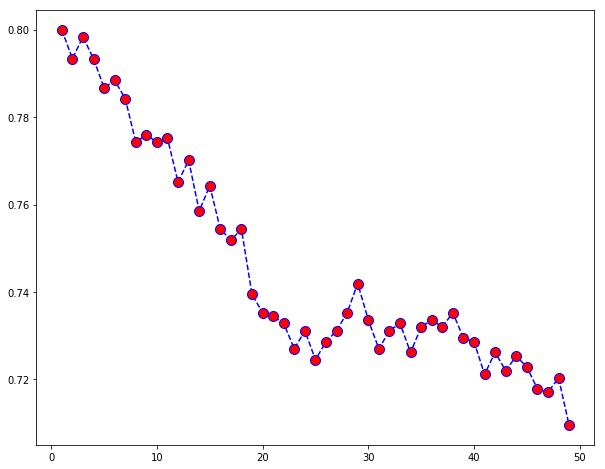

In [4]:
# Standardized values, no grouping of rings. 70 to 80% misclassification error 

X = df.drop(['Unnamed: 0','classRings'], axis=1)
y = df['classRings'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

errorRate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    errorRate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,50), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [5]:
df = pd.read_csv('abalone_zVals_withDiscreteRings_Grouped.csv')
df.describe()


,Unnamed: 0,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings,sex,ageGroup
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,2103.033367,-0.021203,-0.022225,-0.034908,-0.051894,-0.042474,-0.043665,-0.057566,9.734811,0.990787,4.473108
std,1202.609510,0.952738,0.951411,0.859161,0.915993,0.925096,0.926917,0.905109,2.877948,0.797983,2.121531
min,0.000000,-2.984411,-2.954668,-2.907645,-2.001694,-1.932087,-2.148889,-2.006440,2.000000,0.000000,1.000000
25%,1069.750000,-0.622566,-0.630679,-0.575718,-0.747163,-0.759870,-0.736841,-0.741405,8.000000,0.000000,3.000000
50%,2097.500000,0.112612,0.126980,-0.039689,-0.098237,-0.093959,-0.114661,-0.108159,9.000000,1.000000,4.000000
75%,3141.250000,0.668292,0.660342,0.535138,0.561297,0.568168,0.576400,0.520148,11.000000,2.000000,6.000000
max,4176.000000,2.318146,2.310570,2.563993,2.953783,2.969824,2.959971,2.966210,20.000000,2.000000,8.000000


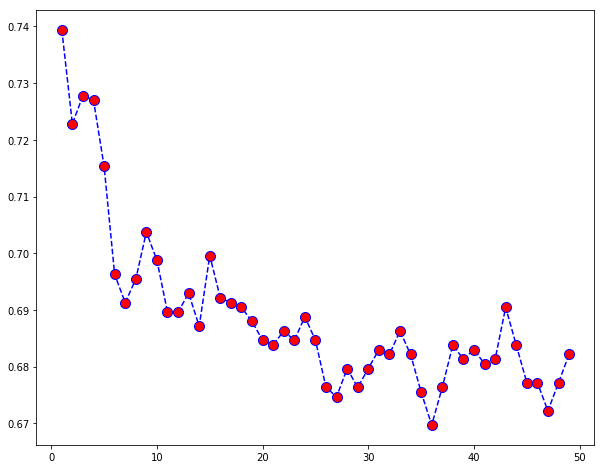

In [6]:
# Standardized values, rings grouped, better classification rate but not there yet... 67% misclassification
# Kannski búa til svona matrix..

X = df.drop(['Unnamed: 0','classRings', 'ageGroup'], axis=1)
y = df['ageGroup'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

errorRate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    errorRate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,50), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)


In [7]:
knn = KNeighborsClassifier(n_neighbors= 36)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train) 
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.54      0.77      0.64       118
           2       0.42      0.24      0.31       131
           3       0.34      0.33      0.34       174
           4       0.29      0.41      0.34       204
           5       0.23      0.32      0.27       170
           6       0.29      0.21      0.24       146
           7       0.20      0.12      0.15       137
           8       0.41      0.25      0.31       125

   micro avg       0.33      0.33      0.33      1205
   macro avg       0.34      0.33      0.32      1205
weighted avg       0.33      0.33      0.32      1205

Confusion Matrix: 
 [[91 13  7  4  2  0  1  0]
 [48 32 30 12  7  0  1  1]
 [20 15 58 50 24  2  2  3]
 [ 3  8 36 84 51 13  7  2]
 [ 4  2 15 56 54 22 11  6]
 [ 2  4 13 38 37 31 14  7]
 [ 0  2  9 24 32 28 17 25]
 [ 0  0  4 18 29 12 31 31]]
Training Score:  0.3984347207399502
Testing Score:  0.33029045643153526


In [8]:
df = pd.read_csv('abalone_zVals_withDiscreteRings_AggressiveGrouping.csv')
df.describe()

,Unnamed: 0,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings,sex,ageGroup
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,2103.033367,-0.021203,-0.022225,-0.034908,-0.051894,-0.042474,-0.043665,-0.057566,9.734811,0.990787,1.486056
std,1202.609510,0.952738,0.951411,0.859161,0.915993,0.925096,0.926917,0.905109,2.877948,0.797983,0.499868
min,0.000000,-2.984411,-2.954668,-2.907645,-2.001694,-1.932087,-2.148889,-2.006440,2.000000,0.000000,1.000000
25%,1069.750000,-0.622566,-0.630679,-0.575718,-0.747163,-0.759870,-0.736841,-0.741405,8.000000,0.000000,1.000000
50%,2097.500000,0.112612,0.126980,-0.039689,-0.098237,-0.093959,-0.114661,-0.108159,9.000000,1.000000,1.000000
75%,3141.250000,0.668292,0.660342,0.535138,0.561297,0.568168,0.576400,0.520148,11.000000,2.000000,2.000000
max,4176.000000,2.318146,2.310570,2.563993,2.953783,2.969824,2.959971,2.966210,20.000000,2.000000,2.000000


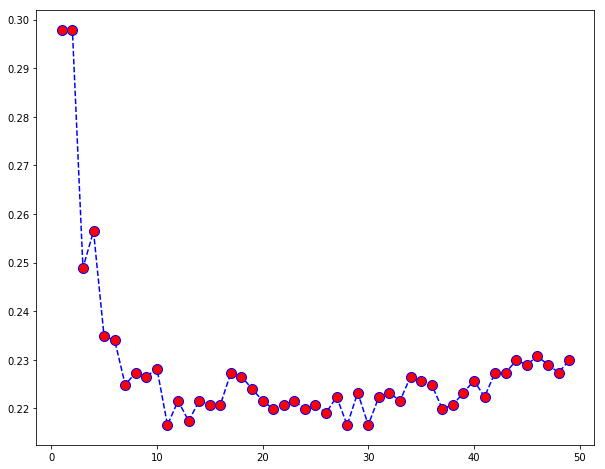

In [9]:
# aggressive grouping, næ 20%-ish misclassification
X = df.drop(['Unnamed: 0','classRings', 'ageGroup'], axis=1)
y = df['ageGroup'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

errorRate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    errorRate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,50), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [10]:
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train) 
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.80      0.78      0.79       627
           2       0.77      0.79      0.78       578

   micro avg       0.78      0.78      0.78      1205
   macro avg       0.78      0.78      0.78      1205
weighted avg       0.78      0.78      0.78      1205

Confusion Matrix: 
 [[489 138]
 [123 455]]
Training Score:  0.8068303094983992
Testing Score:  0.783402489626556


In [11]:
# Ætla aðeins að prófa að droppa columns, nota aðeins þessa þrjá
df = pd.read_csv('abalone_zVals_withDiscreteRings_AggressiveGrouping.csv')
df.describe()

,Unnamed: 0,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings,sex,ageGroup
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,2103.033367,-0.021203,-0.022225,-0.034908,-0.051894,-0.042474,-0.043665,-0.057566,9.734811,0.990787,1.486056
std,1202.609510,0.952738,0.951411,0.859161,0.915993,0.925096,0.926917,0.905109,2.877948,0.797983,0.499868
min,0.000000,-2.984411,-2.954668,-2.907645,-2.001694,-1.932087,-2.148889,-2.006440,2.000000,0.000000,1.000000
25%,1069.750000,-0.622566,-0.630679,-0.575718,-0.747163,-0.759870,-0.736841,-0.741405,8.000000,0.000000,1.000000
50%,2097.500000,0.112612,0.126980,-0.039689,-0.098237,-0.093959,-0.114661,-0.108159,9.000000,1.000000,1.000000
75%,3141.250000,0.668292,0.660342,0.535138,0.561297,0.568168,0.576400,0.520148,11.000000,2.000000,2.000000
max,4176.000000,2.318146,2.310570,2.563993,2.953783,2.969824,2.959971,2.966210,20.000000,2.000000,2.000000


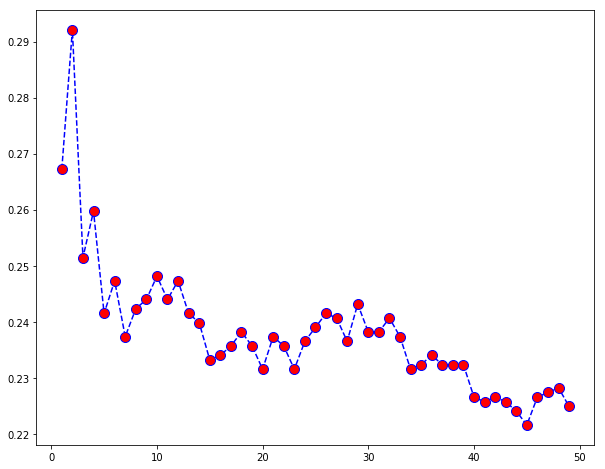

In [12]:

# aggressive prófa að nota bara shellweight, height
X = df.drop(['Unnamed: 0','classRings', 'ageGroup','length','wholeWeight','shuckedWeight','visceraWeight'], axis=1)
y = df['ageGroup'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

errorRate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    errorRate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,50), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [45]:
# aðeins að fikta, ekki til að fara í skýrslu
knn_grid = [
    {'n_neighbors': [i+1 for i in range(10)] }, 
]
knn = KNeighborsRegressor()
knn_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5,
                          return_train_score=True, n_jobs=-1)
knn_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [54]:
knn_search.best_params_

{'n_neighbors': 10}

In [55]:
result = knn_search.cv_results_
for mean_acc, params in zip(result['mean_test_score'], result['params']):
    print(mean_acc, params)

-0.28850942725008893 {'n_neighbors': 1}
-0.21744930629669157 {'n_neighbors': 2}
-0.1910352187833511 {'n_neighbors': 3}
-0.18042956243329775 {'n_neighbors': 4}
-0.17297758804695837 {'n_neighbors': 5}
-0.16855409304715602 {'n_neighbors': 6}
-0.1633088667697602 {'n_neighbors': 7}
-0.15984080398434722 {'n_neighbors': 8}
-0.15836813927647558 {'n_neighbors': 9}
-0.15585556741373174 {'n_neighbors': 10}


In [56]:
# try other models
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma}

In [57]:
svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=20, verbose=1)
svm_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min


In [ ]:
svm_search.best_params_

In [ ]:
result = svm_search.cv_results_
for mse, params in zip(result['mean_test_score'], result['params']):
    print(mse, params)

In [ ]:
ensemble_grid =  {'n_estimators': [(i+1)*10 for i in range(20)],
                 'criterion': ['mse', 'mae'],
                 'bootstrap': [True, False]}

ensemble = RandomForestRegressor()
ensemble_search = RandomizedSearchCV(ensemble, ensemble_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=10, verbose=1)
ensemble_search.fit(X_train, y_train)

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
  model = KMeans(num_clusters)
  model.fit(df)
  cluster_errors.append(model.inertia_)

In [ ]:
# fine tune hyperparamaters
knn_grid = [
    {'n_neighbors': [i+1 for i in range(10)] }, 
]
knn = KNeighborsRegressor()
knn_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5,
                          return_train_score=True, n_jobs=-1)
knn_search.fit(X_train, y_train)

In [ ]:
clusters_df = pd.DataFrame({'clusters':cluster_range,
                            'inertia': cluster_errors})
clusters_df

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(clusters_df['clusters'],clusters_df['inertia'],marker = 'o')
plt.xlabel('k')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_clusters = 5,n_init = 15,random_state = 2)
kmeans.fit(df)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

In [ ]:
centroid_df = pd.DataFrame(centroids,columns = list(df.columns))
centroid_df

In [ ]:
df['labels'] = list(kmeans.labels_)
df.head()

In [32]:
#sns.pairplot(df,hue = 'labels')#

In [13]:
df.head()

,Unnamed: 0,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings,sex,ageGroup
0,1,-2.059060,-2.065731,-1.764168,-1.628220,-1.495763,-1.592650,-1.620669,7,1,1
1,8,-0.841492,-0.821219,-0.758222,-1.024514,-0.970928,-0.982456,-0.894321,9,1,1
2,18,-1.912952,-1.710156,-2.051581,-1.564449,-1.506978,-1.645088,-1.391296,7,1,1
3,19,-1.085006,-1.413844,-1.476755,-1.297670,-1.177273,-1.339991,-1.276609,9,1,1
4,35,-0.938898,-0.999007,-1.333048,-1.088286,-0.923827,-0.872811,-1.200152,8,1,1


In [18]:
df.iloc[:,7]

0      -1.620669
1      -0.894321
2      -1.391296
3      -1.276609
4      -1.200152
5      -1.467754
6      -1.085465
7      -1.391296
8      -1.314838
9      -1.123694
10     -0.856092
11     -1.123694
12     -0.817863
13     -1.391296
14     -0.741405
15     -1.123694
16      0.252546
17     -0.244430
18     -1.047236
19     -0.894321
20     -0.970778
21     -0.817863
22     -0.894321
23     -1.505983
24     -1.620669
25     -1.674190
26     -1.448639
27      0.023173
28     -1.238380
29     -1.697127
          ...   
3986    2.394919
3987    2.141667
3988    1.493811
3989    0.781170
3990    0.722274
3991    1.081540
3992    1.552707
3993    2.094550
3994    0.669268
3995   -0.626443
3996    0.904852
3997    1.022644
3998    1.729395
3999    2.377251
4000    1.729395
4001    1.470253
4002    0.728164
4003    0.610372
4004    0.516138
4005    0.633930
4006    0.728164
4007    0.963748
4008    1.258227
4009    1.022644
4010    1.735285
4011    1.552707
4012    1.317123
4013    1.5232

Text(0.5, 0.92, '3D plot for KMeans Clustering using only 3 values')

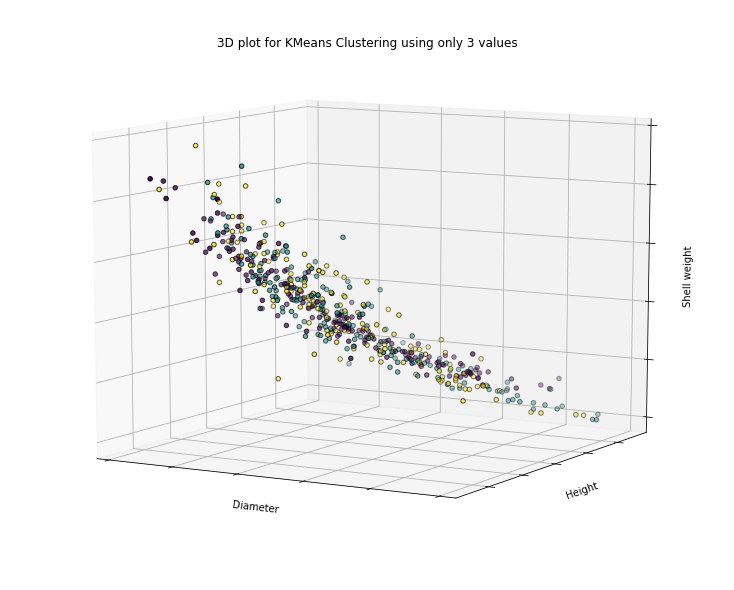

In [43]:

dfPlot = df.sample(500)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig,rect = [0,0,1,1],elev = 10,azim = 120)

labels = 'Group1', 'Group2', 'Group 3'


ax.scatter(dfPlot.iloc[:,2],dfPlot.iloc[:,3],dfPlot.iloc[:,7],c = dfPlot.sex, edgecolor = 'k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Diameter')
ax.set_ylabel('Height')
ax.set_zlabel('Shell weight')
ax.set_title('3D plot for KMeans Clustering using only 3 values')


In [35]:
# Það væri kúl að plotta upp rétt classified vs rangt classified (sem rauða)
def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save('3d_ageGroups.gif', writer=animation.PillowWriter(fps=10))

In [24]:
df.describe()

,Unnamed: 0,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings,sex,ageGroup
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,2103.033367,-0.021203,-0.022225,-0.034908,-0.051894,-0.042474,-0.043665,-0.057566,9.734811,0.990787,1.486056
std,1202.609510,0.952738,0.951411,0.859161,0.915993,0.925096,0.926917,0.905109,2.877948,0.797983,0.499868
min,0.000000,-2.984411,-2.954668,-2.907645,-2.001694,-1.932087,-2.148889,-2.006440,2.000000,0.000000,1.000000
25%,1069.750000,-0.622566,-0.630679,-0.575718,-0.747163,-0.759870,-0.736841,-0.741405,8.000000,0.000000,1.000000
50%,2097.500000,0.112612,0.126980,-0.039689,-0.098237,-0.093959,-0.114661,-0.108159,9.000000,1.000000,1.000000
75%,3141.250000,0.668292,0.660342,0.535138,0.561297,0.568168,0.576400,0.520148,11.000000,2.000000,2.000000
max,4176.000000,2.318146,2.310570,2.563993,2.953783,2.969824,2.959971,2.966210,20.000000,2.000000,2.000000


,Unnamed: 0,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,classRings,sex,ageGroup
0,1,-2.059060,-2.065731,-1.764168,-1.628220,-1.495763,-1.592650,-1.620669,7,1,1
1,8,-0.841492,-0.821219,-0.758222,-1.024514,-0.970928,-0.982456,-0.894321,9,1,1
2,18,-1.912952,-1.710156,-2.051581,-1.564449,-1.506978,-1.645088,-1.391296,7,1,1
3,19,-1.085006,-1.413844,-1.476755,-1.297670,-1.177273,-1.339991,-1.276609,9,1,1
4,35,-0.938898,-0.999007,-1.333048,-1.088286,-0.923827,-0.872811,-1.200152,8,1,1
5,39,-2.010357,-1.769419,-1.764168,-1.411396,-1.341004,-1.235114,-1.467754,9,1,1
6,46,-0.890195,-0.821219,-0.901928,-0.875713,-0.627766,0.109220,-1.085465,9,1,1
7,51,-1.572033,-1.413844,-1.620461,-1.463477,-1.343247,-1.483005,-1.391296,7,1,1
8,54,-1.523330,-1.532369,-1.476755,-1.289167,-1.166059,-1.182675,-1.314838,7,1,1
9,56,-1.133708,-1.058269,-0.901928,-1.166938,-1.080829,-1.144538,-1.123694,8,1,1


In [21]:
setja 
https://morioh.com/p/51b5c19afa26

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top',labels = labelList, 
  distance_sort ='descending',show_leaf_counts = True)
plt.show()

IndexError: range object index out of range